In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from malnis import show
from nltk.tokenize import word_tokenize
from tqdm.auto import tqdm
import scipy.sparse as sp
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA, SparsePCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score, average_precision_score, PrecisionRecallDisplay
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split

/home/jarobyte/envs/malnis/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(


In [2]:
pwd

'/home/jarobyte/malnis_dataset/notebooks'

In [10]:
data = pd.read_pickle("../data/labels.pkl").reset_index(drop = True)#.head(50)
show(data, 20)

(8965, 8)


,query,document,summary,r1,r2,rl,sentences,relevance
0,We introduce a new language representation mod...,"KEYWORDS cascade ranking, pre-trained language...",[Our approach is mainly based on the BERT lang...,0.237885,0.065359,0.229075,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
1,The dominant sequence transduction models are ...,"KEYWORDS cascade ranking, pre-trained language...",[BERT [2] is a self-supervised approach for pr...,0.238372,0.063366,0.215116,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
2,Language model pretraining has led to signific...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.172727,0.047782,0.172727,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."
3,With the capability of modeling bidirectional ...,"KEYWORDS cascade ranking, pre-trained language...","[Recently, some variants [4, 12] of BERT langu...",0.237838,0.078740,0.227027,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Tru..."
4,Neural sequence-to-sequence models have provid...,"KEYWORDS cascade ranking, pre-trained language...",[The proposed model is based on the pointer-ge...,0.215139,0.093023,0.199203,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
5,Increasing model size when pretraining natural...,"KEYWORDS cascade ranking, pre-trained language...",[Some others found it beneficial to modify the...,0.253165,0.083832,0.236287,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
6,"Recently, neural models pretrained on a langua...","KEYWORDS cascade ranking, pre-trained language...",[After the new BERT language model is pre-trai...,0.278075,0.100386,0.256684,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
7,"Recently, the pre-trained language model, BERT...","KEYWORDS cascade ranking, pre-trained language...",[Different from many other ranking methods whi...,0.277778,0.090667,0.246032,"[KEYWORDS cascade ranking, pre-trained languag...","[True, False, False, False, False, False, Fals..."
8,Sequence-to-Sequence (seq2seq) modeling has ra...,"KEYWORDS cascade ranking, pre-trained language...","[After the query generation model is trained, ...",0.251163,0.068493,0.232558,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, False, Fal..."
9,The Deep Learning Track is a new track for TRE...,"KEYWORDS cascade ranking, pre-trained language...","[The details of task construction, evaluation ...",0.392157,0.148936,0.372549,"[KEYWORDS cascade ranking, pre-trained languag...","[False, False, False, False, False, True, Fals..."


<AxesSubplot:ylabel='Frequency'>

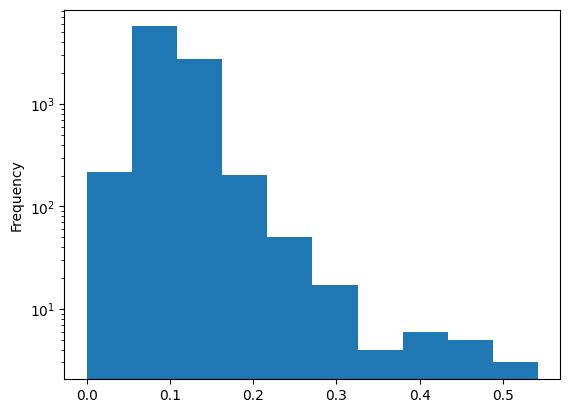

In [11]:
data.r2.plot.hist(log = True)

In [12]:
data["query"][36]

'The recently proposed BERT has shown great power on a variety of natural language understanding tasks, such as text classification, reading comprehension, etc. However, how to effectively apply BERT to neural machine translation (NMT) lacks enough exploration. While BERT is more commonly used as fine-tuning instead of contextual embedding for downstream language understanding tasks, in NMT, our preliminary exploration of using BERT as contextual embedding is better than using for fine-tuning. This motivates us to think how to better leverage BERT for NMT along this direction. We propose a new algorithm named BERT-fused model, in which we first use BERT to extract representations for an input sequence, and then the representations are fused with each layer of the encoder and decoder of the NMT model through attention mechanisms. We conduct experiments on supervised (including sentence-level and document-level translations), semi-supervised and unsupervised machine translation, and achi

In [13]:
[s for s, l in zip(data.sentences[36], data.relevance[36]) if l == True]

['BERT (Devlin et al., 2019) and its improvements to natural language understanding have spurred a rapid succession of contextual language representations (Yang et al., 2019; Liu et al., 2019; inter alia) which use larger datasets and more involved training schemes.',
 'Existing uses of pretrained MLMs in sequenceto-sequence models for automatic speech recognition (ASR) or neural machine translation (NMT) involve integrating their weights (Clinchant et al., 2019) or representations (Zhu et al., 2020) into the encoder and/or decoder during training.',
 'We tune the LM weight λ on the development set to minimize word error rate (WER) for ASR or maximize tokenized BLEU for NMT.',
 'We finetune BERT to produce scores without [MASK] tokens.',
 'In particular, we see the outsized cost of the unconditional first unigram in Figure 3.',
 'Furthermore, neither work considers the inference cost of masked rescoring, which we address with our maskless scoring approach, or analyze PLL’s numerical pr

In [14]:
len(data.relevance[36])

258

In [15]:
model = SentenceTransformer(
    "sbert"
#     'all-MiniLM-L6-v2', 
#     cache_folder = "../assets"
#     "../cache/huggingface/transformers/"
#     cache_folder = "../cache/huggingface/transformers"
)
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [17]:
query_embeddings = model.encode(data["query"], show_progress_bar = True)
query_embeddings.shape

Batches:   0%|          | 0/281 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
dims = query_embeddings.shape[1]
sentence_embeddings = [
    model.encode(l)#.toarray() 
    for l in tqdm(data.sentences)
]
all([l.shape[1] == dims for l in sentence_embeddings])

In [ ]:
# query_embeddings.shape[0] == len(sentence_embeddings)

In [ ]:
sum([len(l) for l in tqdm(data.sentences)])

In [ ]:
train = [
#     ((sp.csr_matrix(np.ones([l.shape[0],1])) * q) - l).power(2)
#     (q - l)**2
    np.concatenate([np.tile(q, (l.shape[0], 1)), l], axis = 1)
    for q, l in zip(tqdm(query_embeddings), sentence_embeddings)
]
len(train)

In [ ]:
X = np.concatenate(train)#.toarray().T#.squeeze()
X.shape

In [ ]:
np.save("X_sbert_concat.npy", X)

In [18]:
X = np.load("X_sbert_concat.npy")
X.shape

(222254, 768)

In [19]:
Y = np.array([y for l in tqdm(data.relevance) for y in l])
Y.shape

  0%|          | 0/8965 [00:00<?, ?it/s]

(3173352,)

In [20]:
Y.sum()

97353

In [21]:
Y.mean()

0.030678285926049174

In [ ]:
# %%time
# model = LogisticRegression(
#     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [ ]:
# %%time
# model = LogisticRegression(
#     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [ ]:
# %%time
# model = SVC(
# #     C = 10**-2
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [ ]:
# %%time
# model = MLPClassifier(
# #     C = 10**-2
#     verbose = True,
# #     early_stopping = True
# )
# model.fit(X, Y)

# predictions = model.predict_proba(X)

# # predictions.sum()
# predictions.shape

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print("X_train", X_train.shape)
print("X_test", X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [222254, 3173352]

In [ ]:
Y_train.sum(), Y_test.sum()

In [ ]:
%%time

model = MLPClassifier(
#     C = 10**-2
    verbose = True,
#     early_stopping = True
)
model.fit(X_train, Y_train)

predictions = model.predict_proba(X_test)

# predictions.sum()
predictions.shape

In [ ]:
plt.hist(predictions[:, 1])
# plt.xlim(-0.1, 1.1)
plt.show()

In [ ]:
roc_auc_score(Y_test, predictions[:, 1])

In [ ]:
average_precision_score(Y_test, predictions[:, 1])

In [ ]:
f1_score(Y_test, predictions[:, 1] > 0.5)

In [ ]:
display = PrecisionRecallDisplay.from_estimator(
    model, X_test, Y_test, name="Neural Network"
)